이 코드들은 아주 low level로 구현한 거라서 실제로는 사용하지 않을텐데, 이론을 기반으로 한 거기 때문에 봐두면 좋다!

# Gradient Descent

In [1]:
import torch
import torch.nn.functional as F

In [2]:
target = torch.FloatTensor([[.1, .2, .3],
                            [.4, .5, .6],
                            [.7, .8, .9]])

In [ ]:
x = torch.rand_like(target)   # x가 사실은 모델 출력값(y)를 의미
print(x)

In [3]:
# This means the final scalar will be differentiate by x.
x.requires_grad = True
# You can get gradient of x, after differentiation.

x

tensor([[0.8693, 0.6091, 0.5072],
        [0.7900, 0.3290, 0.6847],
        [0.3789, 0.1166, 0.3602]], requires_grad=True)

|x| = (3,3)임

In [4]:
loss = F.mse_loss(x, target)

loss  # 현재 x 값으로는 loss가 0.2058임 

tensor(0.2058, grad_fn=<MseLossBackward>)

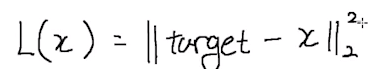

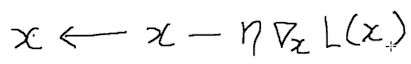

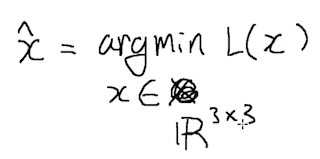

loss.backward() 코드 실행 결과로 x.grad가 생성됨!

In [5]:
# Loss를 최소화시키는 x를 찾도록 해보기

threshold = 1e-5   # 10의 -5승: Loss가 10의 -5승 미만이 될 때까지 x를 업데이트
learning_rate = 1.
iter_cnt = 0

while loss > threshold:  # loss가 threshold보다 크다면 아래 블록을 계속 실행
    iter_cnt += 1
    
    loss.backward() # Calculate gradients.   # loss라는 스칼라 값에 관여한 값들을 미분함
                    # ∇xL(x)를 구하는 거에 해당

    x = x - learning_rate * x.grad  # x값을 업데이트함  ( x.grad = ∇xL(x) )
    # x.grad는 어떤 scalar 값(Loss)에 대한 x의 변화도를 갖고 있는 Tensor
    
    
    # You don't need to aware this now.
    x.detach_() 
    x.requires_grad_(True)
    
    loss = F.mse_loss(x, target)  # loss값 업데이트
    
    print('%d-th Loss: %.4e' % (iter_cnt, loss))  
    # print('{}th Loss: {:4e}'.format(iter_cnt, loss)) 이렇게 해도 됨
    print(x)
    print('')

1-th Loss: 1.2450e-01
tensor([[0.6984, 0.5182, 0.4612],
        [0.7033, 0.3670, 0.6659],
        [0.4502, 0.2685, 0.4801]], requires_grad=True)
2-th Loss: 7.5312e-02
tensor([[0.5654, 0.4475, 0.4253],
        [0.6359, 0.3966, 0.6512],
        [0.5057, 0.3866, 0.5734]], requires_grad=True)
3-th Loss: 4.5559e-02
tensor([[0.4620, 0.3925, 0.3975],
        [0.5835, 0.4196, 0.6398],
        [0.5489, 0.4785, 0.6460]], requires_grad=True)
4-th Loss: 2.7560e-02
tensor([[0.3815, 0.3497, 0.3758],
        [0.5427, 0.4374, 0.6310],
        [0.5825, 0.5499, 0.7024]], requires_grad=True)
5-th Loss: 1.6672e-02
tensor([[0.3190, 0.3164, 0.3590],
        [0.5110, 0.4513, 0.6241],
        [0.6086, 0.6055, 0.7463]], requires_grad=True)
6-th Loss: 1.0086e-02
tensor([[0.2703, 0.2906, 0.3459],
        [0.4863, 0.4621, 0.6187],
        [0.6289, 0.6487, 0.7805]], requires_grad=True)
7-th Loss: 6.1012e-03
tensor([[0.2325, 0.2704, 0.3357],
        [0.4671, 0.4706, 0.6146],
        [0.6447, 0.6823, 0.8070]], requi

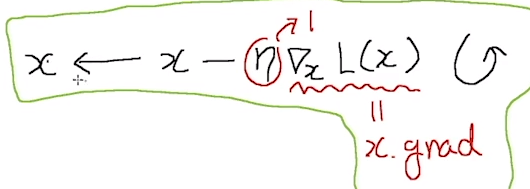

- 위 코드 블록 결과를 보면 20-th Loss에서 x의 값이 target 값과 매우 유사해졌음
- Gradient Descent: 어떤 함수(Loss Function)가 주어졌을 때 해당 함수값(Loss)을 최소화하는 입력(파라미터  θ)을 찾아내는 것 → Loss 값이 최소화되기 위해서는 target과 출력값(이 코드에서는 x에 해당)이 비슷해야함

|target| = (3,3)

|x| = (3,3)

L(x) = MSE(x,target)

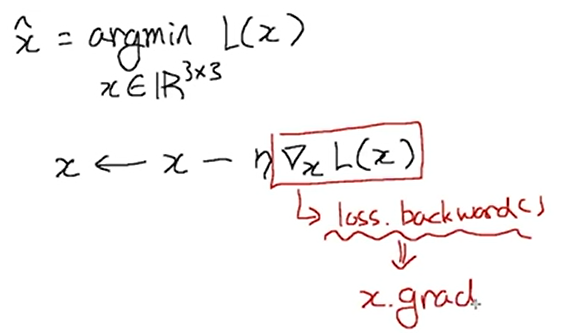